In [3]:
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
import matplotlib.patches as patches
import os

In [4]:
DIR = 'metric_scores/'
metrics = ['utilization_scores', 'socioeconomic_scores', 'diversity_scores', 'walkability_scores', 'baseline_scores']
#scores~<SchoolType=['ES', 'MS', 'HS'], #w, #runs> ~ shape <3, 11, 25>
for m in metrics:
    saved_PATH = "{}{}.pkl".format(DIR, m)
    with open(saved_PATH, 'rb') as f:
        temp = pkl.load(f)
        exec(m+'=temp')

# # socioeconomic_scores ~ (#SchoolType=3, #w=11, #runs=25)
# with open('socioeconomic_scores.pkl', 'rb') as f:
#     socioeconomic_scores = pkl.load(f)

In [5]:
def get_line(scores, SCHOOL_TYPE='ES', num_w=11):
    means, std_errors = [], []
    for i in range(num_w):
        means.append(np.mean(scores[SCHOOL_TYPE][i]))
        std_errors.append(np.std(scores[SCHOOL_TYPE][i]))
    return np.array(means), np.array(std_errors)

In [6]:
# means, std_errors = get_line(utilization_scores, SCHOOL_TYPE='ES')

In [7]:
metrics = ['utilization_scores', 'socioeconomic_scores', 'diversity_scores', 'walkability_scores', 'baseline_scores']
ylabels = ['Utilization', 'Socioeconomic', 'Diversity', 'Walkability']

In [8]:
ylims = [
    [0, 1],
    [0, 0.2],
    [0, 0.2],
    [0, 0.5]
]

In [9]:
for mi, m in enumerate(metrics[:-1]):
    scores = locals()[m]

    lines = []
    SCHOOL_TYPES = ['ES', 'MS', 'HS']
    for SCHOOL_TYPE in SCHOOL_TYPES:
        means, std_errors = get_line(scores, SCHOOL_TYPE=SCHOOL_TYPE)
        lines.append((means, std_errors))
    cmap = ['#e31a1c', '#1f78b4', '#33a02c', '#6a3d9a']
    fig = plt.figure(dpi=300)
    ax = plt.gca()

    for i, line in enumerate(lines):
        means, std_errors = line
        ax.plot(means, '-', c=cmap[i], label=SCHOOL_TYPES[i])
        plt.fill_between(range(11), means-std_errors, means+std_errors, color=cmap[i], alpha=1-0.618)
        
        
        r = m.rfind('_')
        mk = m[:r]
        plt.hlines(baseline_scores[mk][SCHOOL_TYPES[i]], 0, 10, 
                   color=cmap[i], linestyles='--', label='{} existing plan'.format(SCHOOL_TYPES[i]))
    ax.tick_params(axis='y', which='major', labelsize=14)


    ax.set_xlim([0, 10])
    xtickslabels = ['{:.1f}'.format(x / 10.) for x in range(0, 11, 2)]
    ax.set_xticklabels(xtickslabels, fontsize=14)

    ax.set_ylim(ylims[mi])

    ax.set_aspect(1. /ax.get_data_ratio())

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('{} Scores'.format(ylabels[mi]), fontsize=16)
    # ax.set_title('School=Elementary')

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_autoscalex_on(False)
    ax.legend(fontsize=8)

    # rect = patches.Rectangle((6, 0), 2, 100, edgecolor = None, facecolor = "green", alpha=0.3, zorder = 3)
    # ax.add_patch(rect)

    DIR_figures = './figures/'
    if os.path.exists(DIR_figures) == False:
        os.makedirs(DIR_figures)
    fn = '{}{}.png'.format(DIR_figures, m)
    fig.savefig(fn, bbox_inches = 'tight')
    plt.close()
#     plt.show()
#     break

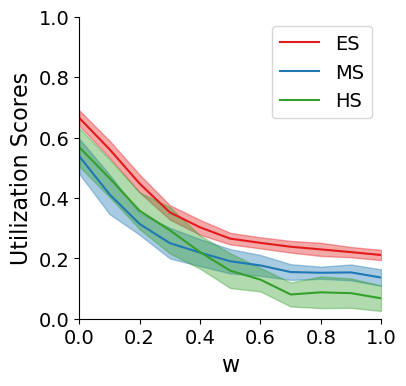

In [10]:
# UTILIZATION SCORES
lines = []
SCHOOL_TYPES = ['ES', 'MS', 'HS']
for SCHOOL_TYPE in SCHOOL_TYPES:
    means, std_errors = get_line(utilization_scores, SCHOOL_TYPE=SCHOOL_TYPE)
    lines.append((means, std_errors))
cmap = ['#e31a1c', '#1f78b4', '#33a02c', '#6a3d9a']
fig = plt.figure(dpi=100)
ax = plt.gca()

for i, line in enumerate(lines):
    means, std_errors = line
    ax.plot(means, '-', c=cmap[i], label=SCHOOL_TYPES[i])
    plt.fill_between(range(11), means-std_errors, means+std_errors, color=cmap[i], alpha=1-0.618)
ax.tick_params(axis='y', which='major', labelsize=14)


ax.set_xlim([0, 10])
# ax.set_xticks(range(10))
xtickslabels = ['{:.1f}'.format(x / 10.) for x in range(0, 11, 2)]
ax.set_xticklabels(xtickslabels, fontsize=14)
# for tick in ax.xaxis.get_majorticklabels(): tick.set_horizontalalignment("right")

ax.set_ylim([0.0, 1])

ax.set_aspect(1. /ax.get_data_ratio())

ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('Utilization Scores', fontsize=16)
# ax.set_title('School=Elementary')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_autoscalex_on(False)
ax.legend(fontsize=14)

plt.show()